In [104]:
#Import libraries
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import tree

#Read in data
df = pd.read_csv("forestfires.csv") 

Text(0.5, 1.0, 'MSE of test data at each depth')

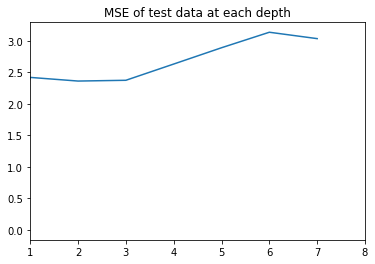

In [275]:
from sklearn import metrics

#Clean data for regression. Log scale area, create dummy variables for months
df['logArea'] = np.log(df.area + 1)
X = df[df.columns[0:12]]
X = pd.get_dummies(X)
X = X._get_numeric_data()
y = df[df.columns[13:14]]

#Create train and test data sets for regression
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0) 

#Start with decision tree regressor. First, find minimum mse for tree depth
mseList = [0]
for i in range (1,8):
    dtReg = DecisionTreeRegressor(max_depth=i)
    dtReg.fit(X_train, y_train)
    y_pred = dtReg.predict(X_test)
    mse = metrics.mean_squared_error(y_test, y_pred)
    mseList.append(mse)

#Plot mse
plt.plot(mseList)
plt.xlim([1, 8])
plt.title("MSE of test data at each depth")

mse =  2.360241421835329
X[6] = Temp


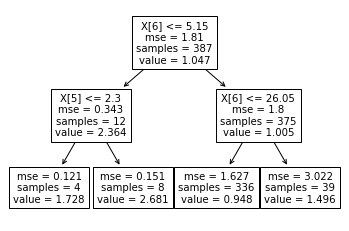

In [276]:
#Fit best decision tree based on mse.
dtReg = DecisionTreeRegressor(max_depth=2)
dtReg.fit(X_train, y_train)
y_pred = dtReg.predict(X_test)
mse = metrics.mean_squared_error(y_test, y_pred)

#Plot tree
tree.plot_tree(dtReg)
print("mse = ", mse)
print("X[6] = Temp")

Text(0.5, 1.0, 'y test (scatter) and tree predictions (line)')

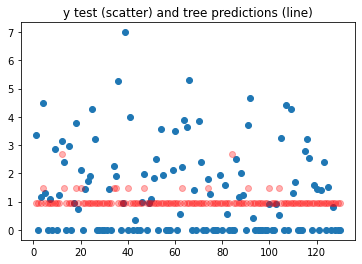

In [278]:
#Plot
x = range(1,len(y_test) + 1)
plt.scatter(x, y_test)
plt.scatter(x, y_pred, color = "red", alpha = 0.3)
plt.title("y test (scatter) and tree predictions (line)")

Text(0.5, 1.0, 'MSE of test data at each depth')

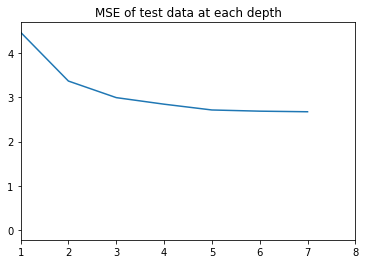

In [252]:
#Now trying k neighbors regression

from sklearn import neighbors

mseList = [0]
for i in range (1,8):
    n_neighbors = i
    knn = neighbors.KNeighborsRegressor(n_neighbors, weights=weights)
    y_pred = knn.fit(X_train, y_train).predict(X_test)
    mse = metrics.mean_squared_error(y_test, y_pred)
    mseList.append(mse)

plt.plot(mseList)
plt.xlim([1, 8])
plt.title("MSE of test data at each depth")


2.993657256350079


Text(0.5, 1.0, 'y test (scatter) and knn predictions (line)')

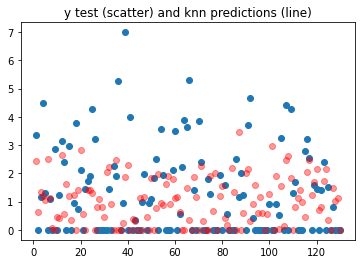

In [271]:
n_neighbors = 3
knn = neighbors.KNeighborsRegressor(n_neighbors, weights=weights)
y_pred = knn.fit(X_train, y_train).predict(X_test)
mse = metrics.mean_squared_error(y_test, y_pred)
mse
print(mse)

#Predicts better but cannot get high outliers
x = range(1,len(y_test) + 1)
plt.scatter(x, y_test)
plt.scatter(x, y_pred, color = "red", alpha = 0.4)
plt.title("y test (scatter) and knn predictions (line)")

2.349356331280137


Text(0.5, 1.0, 'y test (scatter) and knn predictions (line)')

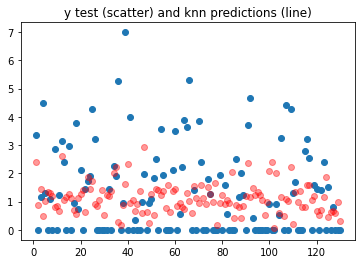

In [288]:
from sklearn import ensemble

#Random forest regression now
forestReg = ensemble.RandomForestRegressor(n_estimators = 100)

forestReg.fit(X_train, y_train.values.ravel())
y_pred = forestReg.predict(X_test)

mse = metrics.mean_squared_error(y_test, y_pred)
print(mse)

#Does not predict 0 as well but predicts high values slightly better
x = range(1,len(y_test) + 1)
plt.scatter(x, y_test)
plt.scatter(x, y_pred, color = "red", alpha = 0.4)
plt.title("y test (scatter) and knn predictions (line)")